# Serology data and Differences for temp workers


This analysis does not correct infection rates to account for the sensitivity and specifity of the tests.

### Interesting  findings

- Infection rates are higher  for temp vs non-temp  workers
- This  difference is greater  in the ski parishes.
- A high number  of temp workers did not show up for the  second test


In [75]:
%config IPCompleter.greedy=True # jupyter autocomplete
%config InlineBackend.figure_format = 'retina'

import  datetime

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


DATA_FILEPATH = '../data/private/'
clean_serology_datafile = DATA_FILEPATH + 'serology_clean.csv'

# columns of interest
PARISH = 'parish'
DATA_TEST_1_DATE = 'data_test_1'
DATA_TEST_2_DATE = 'data_test_2'
IGM_1 = 'igm_1'
IGM_2 = 'igm_2'
IGG_1 = 'igg_1'
IGG_2 = 'igg_2'

TEMP_WORKER = 'temporer'
POSITIVE_TEST_RESULT_VALUE = 'positiu' # positive test result  value in the original data

POSITIVE_TEST_1 = 'positive test 1'

In [77]:
serology_df=pd.read_csv(clean_serology_datafile)[
    [PARISH, DATA_TEST_1_DATE, DATA_TEST_2_DATE, IGM_1, IGG_1, IGM_2, IGG_2, TEMP_WORKER]]
serology_df.head(1)

/Users/aberke/projects/CSL_Andorra_COVID/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (9,10,14,20,24,32,33,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cens_hashed,parish,data_test_1,data_test_2,igm_1,igg_1,igm_2,igg_2,temporer
0,c7aa89bcc19326b19fc59d863548816d,Escaldes Engordany,9/5/20 11:04,23/5/20 11:03,negatiu,negatiu,negatiu,negatiu,0.0


In [68]:
no_test_1_df = serology_df[serology_df[DATA_TEST_1_DATE].isnull()]
has_test_1_df = serology_df[~serology_df[DATA_TEST_1_DATE].isnull()]
has_test_12_df = serology_df[~(serology_df[DATA_TEST_1_DATE].isnull()|serology_df[DATA_TEST_2_DATE].isnull())]
has_test_1_not_2_df = serology_df[(serology_df[DATA_TEST_1_DATE].notnull()&serology_df[DATA_TEST_2_DATE].isnull())]

In [70]:
N = 'N'
NO_TEST_1 = 'no test 1'
DID_TEST_1 = 'did test 1'
DID_TEST_1_2 = 'did test 1 & 2'
DID_TEST_1_NOT_2 = 'did test 1 not 2'
PCT_NO_TEST_1 = '(%) ' + NO_TEST_1
PCT_DID_TEST_1 = '(%) ' + DID_TEST_1
PCT_DID_TEST_1_2 = '(%) ' + DID_TEST_1_2
PCT_DID_TEST_1_NOT_2 = '(%) ' + DID_TEST_1_NOT_2


index = [N, NO_TEST_1, DID_TEST_1, DID_TEST_1_2,  DID_TEST_1_NOT_2]
all_records = [
    len(serology_df),
    len(no_test_1_df),
    len(has_test_1_df),
    len(has_test_12_df),
    len(has_test_1_not_2_df)
]
na_temp_records = [
    len(serology_df[serology_df[TEMP_WORKER].isna()]),
    len(no_test_1_df[no_test_1_df[TEMP_WORKER].isna()]),
    len(has_test_1_df[has_test_1_df[TEMP_WORKER].isna()]),
    len(has_test_12_df[has_test_12_df[TEMP_WORKER].isna()]),
    len(has_test_1_not_2_df[has_test_1_not_2_df[TEMP_WORKER].isna()])
]
non_temp_records = [
    len(serology_df[serology_df[TEMP_WORKER]<1]),
    len(no_test_1_df[no_test_1_df[TEMP_WORKER]<1]),
    len(has_test_1_df[has_test_1_df[TEMP_WORKER]<1]),
    len(has_test_12_df[has_test_12_df[TEMP_WORKER]<1]),
    len(has_test_1_not_2_df[has_test_1_not_2_df[TEMP_WORKER]<1])
]
temp_records = [
    len(serology_df[serology_df[TEMP_WORKER]>0]),
    len(no_test_1_df[no_test_1_df[TEMP_WORKER]>0]),
    len(has_test_1_df[has_test_1_df[TEMP_WORKER]>0]),
    len(has_test_12_df[has_test_12_df[TEMP_WORKER]>0]),
    len(has_test_1_not_2_df[has_test_1_not_2_df[TEMP_WORKER]>0])
]
all_v_temp_table = pd.DataFrame(
    data={
        #'index':index,
        'all':all_records,
        'N/A':na_temp_records,
        'non-temps':non_temp_records,
        'temps':temp_records
    }, index=index
).transpose()
all_v_temp_table.head()

,N,no test 1,did test 1,did test 1 & 2,did test 1 not 2
all,73265,2639,70626,67112,3514
N/A,172,1,171,58,113
non-temps,70186,2445,67741,64999,2742
temps,2907,193,2714,2055,659


In [71]:
all_v_temp_table[PCT_NO_TEST_1] = 100*all_v_temp_table[NO_TEST_1]/all_v_temp_table[N]
all_v_temp_table[PCT_DID_TEST_1] = 100*all_v_temp_table[DID_TEST_1]/all_v_temp_table[N]
all_v_temp_table[PCT_DID_TEST_1_2] = 100*all_v_temp_table[DID_TEST_1_2]/all_v_temp_table[N]
all_v_temp_table[PCT_DID_TEST_1_NOT_2] = 100*all_v_temp_table[DID_TEST_1_NOT_2]/all_v_temp_table[N]
all_v_temp_table[[N, PCT_DID_TEST_1_NOT_2, PCT_NO_TEST_1, PCT_DID_TEST_1,  PCT_DID_TEST_1_2]].round(1)

,N,(%) did test 1 not 2,(%) no test 1,(%) did test 1,(%) did test 1 & 2
all,73265,4.8,3.6,96.4,91.6
N/A,172,65.7,0.6,99.4,33.7
non-temps,70186,3.9,3.5,96.5,92.6
temps,2907,22.7,6.6,93.4,70.7


Much smaller percent of temporary workers got tests vs larger population.
This could be problematic, as  we also find  that  temporary workers had higher infection rates, and this discrepancy prevents proper monitoring of infections in that  population.

# Analyze Infection Rates

Due to the finding  above, 
to minimize bias, the below  analysis only uses data for test 1 and excludes people without data for test 1.

We count a positive test when either of the antibody tests are positive.

In [17]:
def has_positive_test1_result(row):
    return (row[IGM_1] == POSITIVE_TEST_RESULT_VALUE) or (row[IGG_1] == POSITIVE_TEST_RESULT_VALUE)

serology_df[POSITIVE_TEST_1] = serology_df.apply(has_positive_test1_result, axis=1)
serology_df.drop([DATA_TEST_1_DATE, DATA_TEST_2_DATE], axis=1).head()

,parish,igm_1,igg_1,igm_2,igg_2,temporer,positive test 1
0,Escaldes Engordany,negatiu,negatiu,negatiu,negatiu,0.0,False
1,Escaldes Engordany,negatiu,negatiu,negatiu,negatiu,0.0,False
2,Andorra La Vella,negatiu,negatiu,negatiu,negatiu,0.0,False
3,La Massana,negatiu,negatiu,negatiu,negatiu,0.0,False
4,Escaldes Engordany,negatiu,negatiu,negatiu,negatiu,0.0,False


## Compare infection rate by temp workers,  across parishes

#### Show
Number  of temporary workers vs non-temporary workers
- overall
- by parish

Infection rates for temp vs non-temp workers
- overall
- by Parish
- by ski Parishes


In [18]:
test_1_data = serology_df[~serology_df[DATA_TEST_1_DATE].isnull()][
    [PARISH, POSITIVE_TEST_1, TEMP_WORKER]
]
test_1_data.head()

,parish,positive test 1,temporer
0,Escaldes Engordany,False,0.0
1,Escaldes Engordany,False,0.0
2,Andorra La Vella,False,0.0
3,La Massana,False,0.0
4,Escaldes Engordany,False,0.0


In [19]:
POPULATION = 'population'
TEMP = 'temp workers'
NON_TEMP = 'non-temp workers'
POP_TEMP = POPULATION+': '+TEMP
POP_NON_TEMP = POPULATION+': '+NON_TEMP
POSITIVE_TEST_1_TEMP = POSITIVE_TEST_1 + ': ' + TEMP
POSITIVE_TEST_1_NON_TEMP = POSITIVE_TEST_1 + ': ' + NON_TEMP

test_1_data[POPULATION] = 1
test_1_data.rename(columns={TEMP_WORKER:POP_TEMP},inplace=True)
test_1_data[POP_NON_TEMP] = 1 - test_1_data[POP_TEMP]
test_1_data[POSITIVE_TEST_1_TEMP] = (test_1_data[POSITIVE_TEST_1] & (test_1_data[POP_TEMP]>0))
test_1_data[POSITIVE_TEST_1_NON_TEMP] = (test_1_data[POSITIVE_TEST_1] & (test_1_data[POP_NON_TEMP]>0))

test_1_counts_df = test_1_data.groupby(PARISH).sum()[[
    POPULATION, POSITIVE_TEST_1, POP_NON_TEMP, POP_TEMP, 
    POSITIVE_TEST_1_NON_TEMP, POSITIVE_TEST_1_TEMP]]

test_1_counts_df

,population,positive test 1,population: non-temp workers,population: temp workers,positive test 1: non-temp workers,positive test 1: temp workers
parish,,,,,,
Andorra La Vella,4542,330,4236.0,233.0,288,18
Canillo,4495,434,3418.0,1071.0,307,126
Encamp,10846,917,10115.0,715.0,781,131
Escaldes Engordany,28924,2507,28689.0,203.0,2484,11
La Massana,8843,1164,8460.0,369.0,1105,58
Ordino,4214,402,4131.0,74.0,395,7
Sant Julia,8632,1038,8578.0,34.0,1023,7


Combine parishes Andorra La Vela and Escaldes Engordany


In [20]:
ALL_PARISHES = 'All Parishes'
PARISH_ESCALDES = 'Escaldes Engordany'
PARISH_ANDORRA = 'Andorra La Vella'
PARISH_ANDORRA_AND_ESCALDES = 'Andorra La Vella + Escaldes Engordany'

compare_parishes = [
    PARISH_ANDORRA_AND_ESCALDES, 'La Massana', 'Ordino', 
    'Sant Julia', 'Canillo', 'Encamp']

In [21]:
test_1_counts_df.loc[ALL_PARISHES] = test_1_counts_df.sum()
test_1_counts_df.loc[PARISH_ANDORRA_AND_ESCALDES] = test_1_counts_df.loc[PARISH_ESCALDES] \
                                                + test_1_counts_df.loc[PARISH_ANDORRA]

test_1_counts_df.loc[compare_parishes+[ALL_PARISHES]]

,population,positive test 1,population: non-temp workers,population: temp workers,positive test 1: non-temp workers,positive test 1: temp workers
parish,,,,,,
Andorra La Vella + Escaldes Engordany,33466.0,2837.0,32925.0,436.0,2772.0,29.0
La Massana,8843.0,1164.0,8460.0,369.0,1105.0,58.0
Ordino,4214.0,402.0,4131.0,74.0,395.0,7.0
Sant Julia,8632.0,1038.0,8578.0,34.0,1023.0,7.0
Canillo,4495.0,434.0,3418.0,1071.0,307.0,126.0
Encamp,10846.0,917.0,10115.0,715.0,781.0,131.0
All Parishes,70496.0,6792.0,67627.0,2699.0,6383.0,358.0


In [22]:
PCT_POSITIVE_TEST_1 = '(%) ' + POSITIVE_TEST_1
PCT_POSITIVE_TEST_1_TEMP = '(%) ' + POSITIVE_TEST_1_TEMP
PCT_POSITIVE_TEST_1_NON_TEMP = '(%) ' + POSITIVE_TEST_1_NON_TEMP

In [23]:
test_1_counts_df[PCT_POSITIVE_TEST_1] = 100*test_1_counts_df[POSITIVE_TEST_1]/test_1_counts_df[POPULATION]
test_1_counts_df[PCT_POSITIVE_TEST_1_TEMP] = 100*test_1_counts_df[POSITIVE_TEST_1_TEMP]/test_1_counts_df[POP_TEMP]
test_1_counts_df[PCT_POSITIVE_TEST_1_NON_TEMP] = 100*test_1_counts_df[POSITIVE_TEST_1_NON_TEMP]/test_1_counts_df[POP_NON_TEMP]

test_1_counts_df.loc[compare_parishes+[ALL_PARISHES]][[
    POPULATION, POP_TEMP, POP_NON_TEMP, 
    PCT_POSITIVE_TEST_1, PCT_POSITIVE_TEST_1_TEMP, PCT_POSITIVE_TEST_1_NON_TEMP]]

,population,population: temp workers,population: non-temp workers,(%) positive test 1,(%) positive test 1: temp workers,(%) positive test 1: non-temp workers
parish,,,,,,
Andorra La Vella + Escaldes Engordany,33466.0,436.0,32925.0,8.477261,6.651376,8.419134
La Massana,8843.0,369.0,8460.0,13.162954,15.718157,13.061466
Ordino,4214.0,74.0,4131.0,9.539630,9.459459,9.561849
Sant Julia,8632.0,34.0,8578.0,12.025023,20.588235,11.925857
Canillo,4495.0,1071.0,3418.0,9.655172,11.764706,8.981861
Encamp,10846.0,715.0,10115.0,8.454730,18.321678,7.721206
All Parishes,70496.0,2699.0,67627.0,9.634589,13.264172,9.438538


In [24]:
import matplotlib as mpl

COLOR = 'gray'
def set_colors(color=COLOR):
    mpl.rcParams['text.color'] = color
    mpl.rcParams['axes.labelcolor'] = color
    mpl.rcParams['xtick.color'] = color
    mpl.rcParams['ytick.color'] = color
    # transparent background - alpha = 0
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),
        "axes.facecolor":    (1.0, 1.0, 1.0, 0.0),
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),
    })


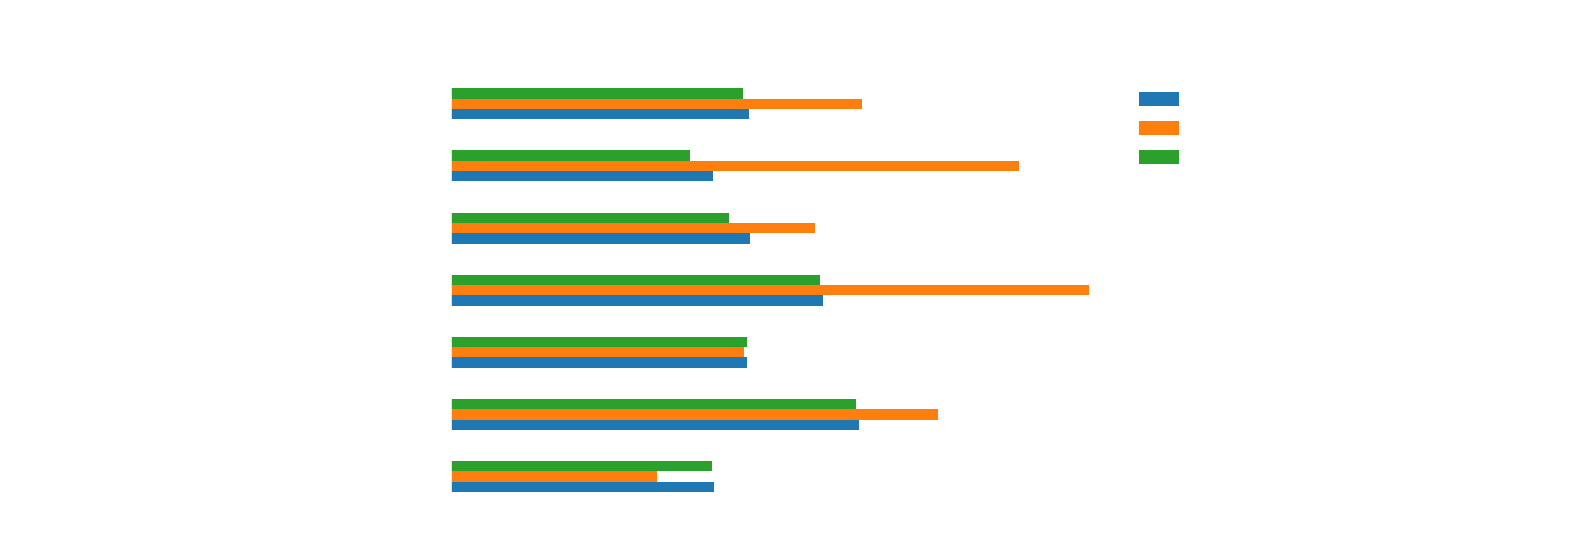

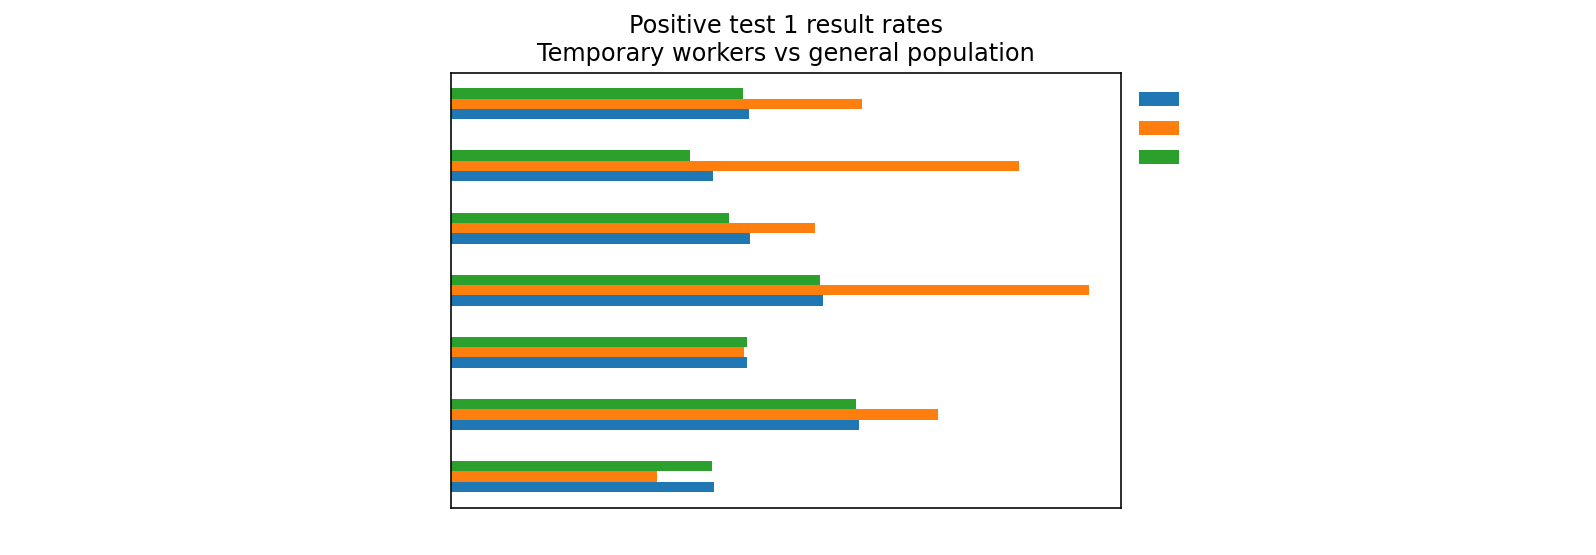

In [25]:
COLOR = 'white'
set_colors(COLOR)
ax = test_1_counts_df.loc[compare_parishes+[ALL_PARISHES]][[
    PCT_POSITIVE_TEST_1, PCT_POSITIVE_TEST_1_TEMP, PCT_POSITIVE_TEST_1_NON_TEMP]
].plot(kind='barh')

plt.title('Positive test 1 result rates\nTemporary workers vs general population',color=COLOR)
plt.legend(bbox_to_anchor=(1., 1), loc='upper left',facecolor=COLOR, framealpha=0)
plt.setp(ax.spines.values(), color=COLOR)
plt.show()

set_colors(COLOR)
COLOR='black'
ax = test_1_counts_df.loc[compare_parishes+[ALL_PARISHES]][[
    PCT_POSITIVE_TEST_1, PCT_POSITIVE_TEST_1_TEMP, PCT_POSITIVE_TEST_1_NON_TEMP]
].plot(kind='barh')

plt.title('Positive test 1 result rates\nTemporary workers vs general population',color=COLOR)
plt.legend(bbox_to_anchor=(1., 1), loc='upper left',facecolor=COLOR, framealpha=0)
plt.setp(ax.spines.values(), color=COLOR)
plt.show()

Overall, temp workers have much higher infection rates. This is much more  the case in the ski parishes vs the main city (Andorra La Vela + Escaldes).

Test for statistical significance.

Outcome: The difference does not seem to be statistically significant.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

infections = test_1_counts_df.loc[ALL_PARISHES][[POSITIVE_TEST_1_NON_TEMP,POSITIVE_TEST_1_TEMP]]
# print(infections.values)
pop = test_1_counts_df.loc[ALL_PARISHES][[POP_NON_TEMP,POP_TEMP]]
# print(pop.values)
stat, pval = proportions_ztest(infections.values, pop.values)
print('overall p-value: {0:0.3f}'.format(pval))

can_infections = test_1_counts_df.loc['Canillo'][[POSITIVE_TEST_1_NON_TEMP,POSITIVE_TEST_1_TEMP]]
can_pop = test_1_counts_df.loc['Canillo'][[POP_NON_TEMP, POP_TEMP]]
stat, pval = proportions_ztest(can_infections.values, can_pop.values)
print('Canillo p-value: {0:0.3f}'.format(pval))

encamp_infections = test_1_counts_df.loc['Encamp'][[POSITIVE_TEST_1_NON_TEMP,POSITIVE_TEST_1_TEMP]]
encamp_pop = test_1_counts_df.loc['Encamp'][[POP_NON_TEMP,POP_TEMP]]
stat, pval = proportions_ztest(encamp_infections.values, encamp_pop.values)
print('Encamp p-value: {0:0.3f}'.format(pval))
proportions_ztest(can_infections, can_pop)

What about when we just  look at the 'ski parishes'? 
i.e. not Andorra / Escaldes

Not even then.

In [27]:
ski_parish_counts = test_1_counts_df.loc[[
    'La Massana', 'Ordino', 'Sant Julia', 'Canillo', 'Encamp']].sum()

In [98]:
ski_infections = ski_parish_counts[[POSITIVE_TEST_1_NON_TEMP,POSITIVE_TEST_1_TEMP]]
print(ski_infections.values)
ski_pop = ski_parish_counts[[POP_NON_TEMP,POP_TEMP]]
print(ski_pop.values)
stat, pval = proportions_ztest(ski_infections.values, ski_pop.values)
print('overall p-value: {0:0.3f}'.format(pval))

[3611.  329.]
[34702.  2263.]
overall p-value: 0.000


## Relationship between positive cases and  no-shows

How is the number of people who tested positive in the first  test related to the number  of people who  did  not show up  for  the second test?

How does this differ by temp  workers  vs  non-temp  workers?

How does this compare to overall infection rates (for people who did test  1 only + people who did test 1 & 2)?

We look at this in 2 ways.

Call the people who did test 1 but  not  test 2 'no-shows'.

### 1.
Likelihood that someone who was a no-show tested positive in test 1.

P(tested positive | no-show) = P(tested positive & no-show)/P(no-show)


### 2.
Likelihood that someone  who tested positive in  test 1 would be a  no-show.

P(no-show | tested positive)  = P(no-show & tested positive)/P(tested positive)



###  1. Likelihood that someone who was a no-show tested positive in test 1.

P(tested positive | no-show) = P(tested positive & no-show)/P(no-show)

To  analyze  this we take the subset of results for people who showed up to test 1 but not 2

We check their infection rates and compare to data for  anyone who was tested for at least test 1 (and possibly test 2)

In [28]:
has_test_1_not_test_2_df = serology_df[
    (serology_df[DATA_TEST_1_DATE].notnull()&serology_df[DATA_TEST_2_DATE].isnull())
].copy()
print(len(has_test_1_not_test_2_df))

3514


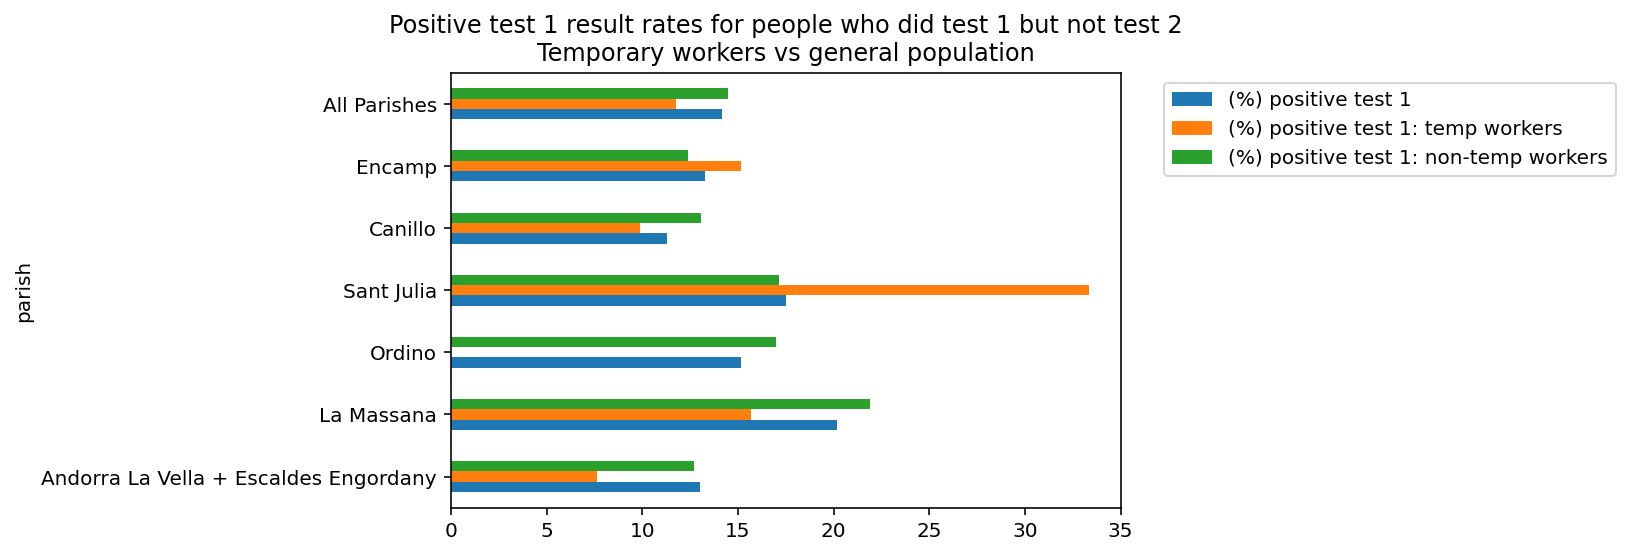

,population,population: temp workers,population: non-temp workers,(%) positive test 1,(%) positive test 1: temp workers,(%) positive test 1: non-temp workers
parish,,,,,,
Andorra La Vella + Escaldes Engordany,1516.0,92.0,1353.0,12.994723,7.608696,12.712491
La Massana,392.0,83.0,297.0,20.153061,15.662651,21.885522
Ordino,165.0,10.0,147.0,15.151515,0.000000,17.006803
Sant Julia,337.0,3.0,327.0,17.507418,33.333333,17.125382
Canillo,478.0,273.0,199.0,11.297071,9.890110,13.065327
Encamp,573.0,185.0,380.0,13.263525,15.135135,12.368421
All Parishes,3461.0,646.0,2703.0,14.157758,11.764706,14.465409


In [29]:
# Same as above...
has_test_1_not_test_2_df[POPULATION] = 1
has_test_1_not_test_2_df.rename(columns={TEMP_WORKER:POP_TEMP},inplace=True)
has_test_1_not_test_2_df[POP_NON_TEMP] = 1 - has_test_1_not_test_2_df[POP_TEMP]
has_test_1_not_test_2_df[POSITIVE_TEST_1_TEMP] = (has_test_1_not_test_2_df[POSITIVE_TEST_1] & (has_test_1_not_test_2_df[POP_TEMP]>0))
has_test_1_not_test_2_df[POSITIVE_TEST_1_NON_TEMP] = (has_test_1_not_test_2_df[POSITIVE_TEST_1] & (has_test_1_not_test_2_df[POP_NON_TEMP]>0))

has_test_1_not_test_2_counts_df = has_test_1_not_test_2_df.groupby(PARISH).sum()[[
    POPULATION, POSITIVE_TEST_1, POP_NON_TEMP, POP_TEMP, 
    POSITIVE_TEST_1_NON_TEMP, POSITIVE_TEST_1_TEMP]]

# combine parishes
has_test_1_not_test_2_counts_df.loc[ALL_PARISHES] = has_test_1_not_test_2_counts_df.sum()
has_test_1_not_test_2_counts_df.loc[PARISH_ANDORRA_AND_ESCALDES] = has_test_1_not_test_2_counts_df.loc[PARISH_ESCALDES] \
                                                + has_test_1_not_test_2_counts_df.loc[PARISH_ANDORRA]

# calculate percentages
has_test_1_not_test_2_counts_df[PCT_POSITIVE_TEST_1] = (
    100*has_test_1_not_test_2_counts_df[POSITIVE_TEST_1]/has_test_1_not_test_2_counts_df[POPULATION])
has_test_1_not_test_2_counts_df[PCT_POSITIVE_TEST_1_TEMP] = (
    100*has_test_1_not_test_2_counts_df[POSITIVE_TEST_1_TEMP]/has_test_1_not_test_2_counts_df[POP_TEMP])
has_test_1_not_test_2_counts_df[PCT_POSITIVE_TEST_1_NON_TEMP] = (
    100*has_test_1_not_test_2_counts_df[POSITIVE_TEST_1_NON_TEMP]/has_test_1_not_test_2_counts_df[POP_NON_TEMP])

set_colors(COLOR)
COLOR='black'
has_test_1_not_test_2_counts_df.loc[compare_parishes+[ALL_PARISHES]][[
    PCT_POSITIVE_TEST_1, PCT_POSITIVE_TEST_1_TEMP, PCT_POSITIVE_TEST_1_NON_TEMP]
].plot(kind='barh')
plt.title('Positive test 1 result rates for people who did test 1 but not test 2\nTemporary workers vs general population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax.spines.values(), color=COLOR)
plt.show()

has_test_1_not_test_2_counts_df.loc[compare_parishes+[ALL_PARISHES]][[
    POPULATION, POP_TEMP, POP_NON_TEMP, 
    PCT_POSITIVE_TEST_1, PCT_POSITIVE_TEST_1_TEMP, PCT_POSITIVE_TEST_1_NON_TEMP]]

### 2. Likelihood that someone  who tested positive in  test 1 would be a  no-show.

P(no-show | tested positive)  = P(no-show & tested positive)/P(tested positive)

To  analyze  this we take the subset of results where people had a positive test 1 result.

We check their no-show rates and compare to the general data.

We do this by repeating the  work  from above and comparing

For comparison: Results from all data

In [30]:
all_v_temp_table[[N, PCT_DID_TEST_1_NOT_2]]

,N,(%) did test 1 not 2
all,73265,4.796287
N/A,172,65.697674
non-temps,70186,3.906762
temps,2907,22.669419


In [31]:
pos_test_1_serology_df  = serology_df[serology_df[POSITIVE_TEST_1]]
print(len(pos_test_1_serology_df))
pos_test_1_serology_df.head(2)

6812


,parish,data_test_1,data_test_2,igm_1,igg_1,igm_2,igg_2,temporer,positive test 1
14,Andorra La Vella,2/5/20 16:07,17/5/20 11:04,positiu,positiu,negatiu,negatiu,0.0,True
16,La Massana,5/5/20 9:01,18/5/20 12:52,positiu,positiu,positiu,positiu,0.0,True


In [32]:
pos_test_1_has_test_1_not_2_df = pos_test_1_serology_df[
    (pos_test_1_serology_df[DATA_TEST_1_DATE].notnull()&pos_test_1_serology_df[DATA_TEST_2_DATE].isnull())
]

In [33]:
pos_test_1_all_v_temp_table = pd.DataFrame(
    data={
        'all':[
            len(pos_test_1_serology_df),
            len(pos_test_1_has_test_1_not_2_df)
        ],
        'N/A': [
            len(pos_test_1_serology_df[serology_df[TEMP_WORKER].isna()]),
            len(pos_test_1_has_test_1_not_2_df[has_test_1_not_2_df[TEMP_WORKER].isna()])
        ],
        'non-temps': [
            len(pos_test_1_serology_df[pos_test_1_serology_df[TEMP_WORKER]<1]),
            len(pos_test_1_has_test_1_not_2_df[pos_test_1_has_test_1_not_2_df[TEMP_WORKER]<1])
        ],
        'temps':  [
            len(pos_test_1_serology_df[pos_test_1_serology_df[TEMP_WORKER]>0]),
            len(pos_test_1_has_test_1_not_2_df[pos_test_1_has_test_1_not_2_df[TEMP_WORKER]>0])
        ]
    }, index=[N, DID_TEST_1_NOT_2],
).transpose()

pos_test_1_all_v_temp_table[PCT_DID_TEST_1_NOT_2] = (
    100*pos_test_1_all_v_temp_table[DID_TEST_1_NOT_2]/pos_test_1_all_v_temp_table[N])
pos_test_1_all_v_temp_table[[N, PCT_DID_TEST_1_NOT_2]]

pos_test_1_all_v_temp_table[[N, PCT_DID_TEST_1_NOT_2]]

/Users/aberke/projects/CSL_Andorra_COVID/env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/aberke/projects/CSL_Andorra_COVID/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,N,(%) did test 1 not 2
all,6812,7.413388
N/A,52,46.153846
non-temps,6400,6.296875
temps,360,21.666667
